### Проверку всех указанных гипотез рекомендуется проводить при уровне значимости 0,05.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

In [20]:
def plot_hist(dataset, color, const = 0, isDensity = False):
    numberOfBins = int(1 + np.ceil(3.322 * np.log10(len(dataset))))+const
    counts, bins = np.histogram(dataset, numberOfBins, density=isDensity)
    ax.hist(bins[:-1], bins, weights=counts, color=color, alpha=0.5, linewidth=0)
    ax.hist(bins[:-1], bins, weights=counts, facecolor='None', edgecolor='k', linewidth=0.8, alpha=0.5)


In [3]:
# data
N = [425, 483, 532, 610, 553, 751, 526, 673, 581, 480]
R = [664,766, 688, 843, 711, 769, 700, 774, 722, 747, 721, 805, 739, 744]
data = pd.DataFrame([N,R], index = ['N','R']).T
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
N,425.0,483.0,532.0,610.0,553.0,751.0,526.0,673.0,581.0,480.0,NaN,NaN,NaN,NaN
R,664.0,766.0,688.0,843.0,711.0,769.0,700.0,774.0,722.0,747.0,721.0,805.0,739.0,744.0


In [4]:
data.describe()

,N,R
count,10.000000,14.000000
mean,561.400000,742.357143
std,97.019128,47.313370
min,425.000000,664.000000
25%,493.750000,713.500000
50%,542.500000,741.500000
75%,602.750000,768.250000
max,751.000000,843.000000


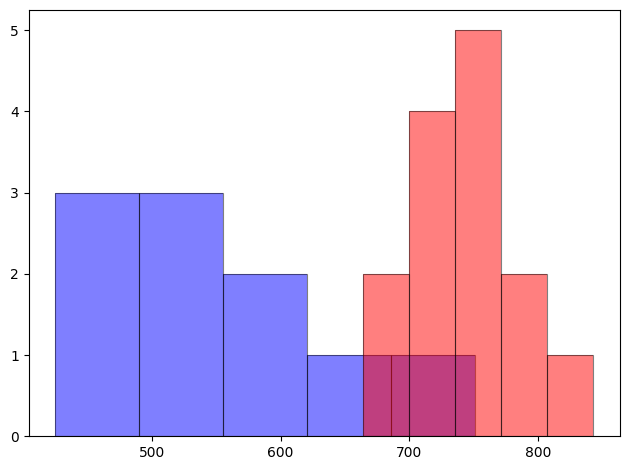

In [23]:
fig = plt.figure(tight_layout=True)
ax = fig.add_subplot()
plot_hist(N,'b')
plot_hist(R,'r')

# 1) Провести проверку гипотезы о нормальном распределении данных выборок.


#### Критерий Шапиро-Уилка

In [11]:
# В стандарте применение критерия предусмотрено при объемах выборки 8 <= n <= 50.
print(f"N p-value: {stats.shapiro(N).pvalue}")
print(f"R p-value: {stats.shapiro(R).pvalue}")

N p-value: 0.7983194589614868
R p-value: 0.9814299941062927


#### Критерий Колмагорова-Смиронова

In [12]:
print(f"N p-value: {stats.kstest(N, 'norm').pvalue}")
print(f"R p-value: {stats.kstest(R, 'norm').pvalue}")

N p-value: 0.0
R p-value: 0.0


#### Критерий D’Agostino-Pearson’а

In [13]:
print(f"N p-value: {stats.normaltest(N).pvalue}")
print(f"R p-value: {stats.normaltest(R).pvalue}")

N p-value: 0.5179545339825424
R p-value: 0.6203387509459921


D:\NNetwork\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Вывод осуществляем по критерию Шапиро-Уилка: не можем отвергнуть нулевую гипотезу о том, что выборки N и R распределены нормально

# 2) Проверить гипотезы о равенстве дисперсий и средних значений выборок.


#### 2.1) Метод сравнения дисперсий

Предположим, что дисперсии выборок совпадают с генеральными дисперсиями

In [60]:
Nvar = np.var(N)
Rvar = np.var(R)
print(f'D[N] = {Nvar}, D[R] = {Rvar},', f'D[N]/D[R] = {Nvar/Rvar}', sep='\n')

D[N] = 8471.439999999999, D[R] = 2078.6581632653065,
D[N]/D[R] = 4.075436812896859


##### 2.2) Критерий Фишера

In [59]:
Nvar = np.var(N, ddof = 1)
Rvar = np.var(R, ddof = 1)
f_statistic = Nvar/Rvar
Nun = len(N) - 1 
Dun = len(R) - 1
p_value = 1 - stats.f.cdf(f_statistic, Nun, Dun)
p_value

0.009866519918580452

### Вывод: p-value для критерия Фишера меньше уровня значимости 0.05 - <i>отвергаем нулевую гипотезу о том, что дисперсии равны

#### 2.3) Сравнение средних по критерию Стьюдента

In [43]:
stats.ttest_ind(N,R)

TtestResult(statistic=-6.0763746687222, pvalue=4.0797288492615375e-06, df=22.0)

### Вывод: p-value для критерия Стьюдента меньше уровня значимости 0.05 - <i>отвергаем нулевую гипотезу о том, что средние равны